# CONTENTS

### 01) Import Libraries and Data
### 02) Wrangle and Clean Data
### 03) The Elbow Technique
### 04) k-means Clustering
### 05) Export Data

# 01 Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
#Graphs are displayed in your notebook

%matplotlib inline

In [3]:
#Import data
df = pd.read_csv(r'/Users/Nick/Documents/CareerFoundry/Immersion-6/College-Equity/02-Data/college-equity-clean.csv')
df.head()

,Unnamed: 0,name,tier,ownership_type,state,city,zip,unitid,student_body,fraction_students_men,...,student_income_6_years_mean,student_income_6_years_median,student_income_6_years_25_percentile,student_income_6_years_75_percentile,student_income_6_years_stdev,student_income_10_years_mean,student_income_10_years_median,student_income_10_years_25_percentile,student_income_10_years_75_percentile,student_income_10_years_stdev
0,0,ASA College,Two-year for-profit,Private for-profit,NY,Brooklyn,11201-9805,404994,4437.0,0.3678,...,22300.0,18100.0,10300.0,31000.0,16800.0,29300.0,26100.0,13800.0,40400.0,21000.0
1,1,Abilene Christian University,Selective private,Private nonprofit,TX,Abilene,79699,222178,3572.0,0.4236,...,38900.0,35600.0,22500.0,50000.0,31300.0,48900.0,43000.0,26700.0,62700.0,38700.0
2,2,Abraham Baldwin Agricultural College,Nonselective four-year public,Public,GA,Tifton,31793-2601,138558,3244.0,0.4750,...,29100.0,26300.0,15800.0,37900.0,19800.0,36300.0,32900.0,19300.0,47500.0,25000.0
3,3,Academy of Art University,Four-year for-profit,Private for-profit,CA,San Francisco,94105,108232,9885.0,0.4342,...,32800.0,26900.0,13700.0,44200.0,29600.0,47300.0,38600.0,19100.0,64000.0,43500.0
4,4,Adams State University,Selective public,Public,CO,Alamosa,81101,126182,2110.0,0.5156,...,28800.0,26700.0,15600.0,37300.0,19600.0,38100.0,35200.0,21200.0,50800.0,25900.0


In [4]:
#Remove Unnamed column
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,name,tier,ownership_type,state,city,zip,unitid,student_body,fraction_students_men,fraction_students_women,...,student_income_6_years_mean,student_income_6_years_median,student_income_6_years_25_percentile,student_income_6_years_75_percentile,student_income_6_years_stdev,student_income_10_years_mean,student_income_10_years_median,student_income_10_years_25_percentile,student_income_10_years_75_percentile,student_income_10_years_stdev
0,ASA College,Two-year for-profit,Private for-profit,NY,Brooklyn,11201-9805,404994,4437.0,0.3678,0.6322,...,22300.0,18100.0,10300.0,31000.0,16800.0,29300.0,26100.0,13800.0,40400.0,21000.0
1,Abilene Christian University,Selective private,Private nonprofit,TX,Abilene,79699,222178,3572.0,0.4236,0.5764,...,38900.0,35600.0,22500.0,50000.0,31300.0,48900.0,43000.0,26700.0,62700.0,38700.0
2,Abraham Baldwin Agricultural College,Nonselective four-year public,Public,GA,Tifton,31793-2601,138558,3244.0,0.4750,0.5250,...,29100.0,26300.0,15800.0,37900.0,19800.0,36300.0,32900.0,19300.0,47500.0,25000.0
3,Academy of Art University,Four-year for-profit,Private for-profit,CA,San Francisco,94105,108232,9885.0,0.4342,0.5658,...,32800.0,26900.0,13700.0,44200.0,29600.0,47300.0,38600.0,19100.0,64000.0,43500.0
4,Adams State University,Selective public,Public,CO,Alamosa,81101,126182,2110.0,0.5156,0.4844,...,28800.0,26700.0,15600.0,37300.0,19600.0,38100.0,35200.0,21200.0,50800.0,25900.0


# 02 Wrangle and Clean Data

In [5]:
df.shape

(3645, 60)

In [6]:
#There are 29 nulls (recall from previous script) to be deleted re: student_income
df = df[df['student_income_10_years_median'].notnull()]
df.head()

,name,tier,ownership_type,state,city,zip,unitid,student_body,fraction_students_men,fraction_students_women,...,student_income_6_years_mean,student_income_6_years_median,student_income_6_years_25_percentile,student_income_6_years_75_percentile,student_income_6_years_stdev,student_income_10_years_mean,student_income_10_years_median,student_income_10_years_25_percentile,student_income_10_years_75_percentile,student_income_10_years_stdev
0,ASA College,Two-year for-profit,Private for-profit,NY,Brooklyn,11201-9805,404994,4437.0,0.3678,0.6322,...,22300.0,18100.0,10300.0,31000.0,16800.0,29300.0,26100.0,13800.0,40400.0,21000.0
1,Abilene Christian University,Selective private,Private nonprofit,TX,Abilene,79699,222178,3572.0,0.4236,0.5764,...,38900.0,35600.0,22500.0,50000.0,31300.0,48900.0,43000.0,26700.0,62700.0,38700.0
2,Abraham Baldwin Agricultural College,Nonselective four-year public,Public,GA,Tifton,31793-2601,138558,3244.0,0.4750,0.5250,...,29100.0,26300.0,15800.0,37900.0,19800.0,36300.0,32900.0,19300.0,47500.0,25000.0
3,Academy of Art University,Four-year for-profit,Private for-profit,CA,San Francisco,94105,108232,9885.0,0.4342,0.5658,...,32800.0,26900.0,13700.0,44200.0,29600.0,47300.0,38600.0,19100.0,64000.0,43500.0
4,Adams State University,Selective public,Public,CO,Alamosa,81101,126182,2110.0,0.5156,0.4844,...,28800.0,26700.0,15600.0,37300.0,19600.0,38100.0,35200.0,21200.0,50800.0,25900.0


In [7]:
df.shape

(3616, 60)

#### Those 29 nulls are now gone.

In [8]:
#Remove categorical columns and others
drop_list = ['tier', 'ownership_type', 'state', 'city', 'zip', 'unitid'
             , 'mean_parent_income', 'mean_child_income'
             , 'percent_child_zero_income', 'mobility_rate'
             , 'tuition_in_state', 'tuition_out_of_state'
             , 'tuition_net', 'pell_grant_rate', 'debt_90_percentile'
             , 'debt_75_percentile', 'debt_25_percentile', 'debt_10_percentile'
             , 'online_only', 'completion_rate', 'student_income_6_years_mean'
             , 'student_income_6_years_median', 'student_income_6_years_25_percentile'
             , 'student_income_6_years_75_percentile', 'student_income_6_years_stdev'
             , 'student_income_10_years_mean', 'student_income_10_years_25_percentile'
             , 'student_income_10_years_75_percentile', 'student_income_10_years_stdev']
df = df.drop(columns = drop_list)

In [9]:
df.head()

,name,student_body,fraction_students_men,fraction_students_women,fraction_students_white,fraction_students_black,fraction_students_hispanic,fraction_students_asian,fraction_students_native_american,fraction_students_pacific_islander,...,fraction_child_income_q3,fraction_child_income_q4,fraction_child_income_q5,median_child_income,cost_of_attendance,pell_aid_per_student,institutional_grant_aid_avg,fraction_students_with_debt,debt_median,student_income_10_years_median
0,ASA College,4437.0,0.3678,0.6322,0.0471,0.3315,0.3980,0.0775,0.0009,0.0014,...,0.251632,0.210021,0.069851,19700,26546.0,3578.4820,3218.60,0.5164,8500.0,26100.0
1,Abilene Christian University,3572.0,0.4236,0.5764,0.6739,0.0798,0.1414,0.0090,0.0039,0.0000,...,0.173277,0.246444,0.307266,40100,41606.0,940.7532,11832.39,0.5945,18500.0,43000.0
2,Abraham Baldwin Agricultural College,3244.0,0.4750,0.5250,0.7830,0.1239,0.0586,0.0071,0.0025,0.0003,...,0.255329,0.273957,0.169737,32500,11674.0,1870.4520,1152.64,0.4831,5500.0,32900.0
3,Academy of Art University,9885.0,0.4342,0.5658,0.2392,0.0685,0.1141,0.0804,0.0051,0.0058,...,0.180868,0.158146,0.261338,27400,35919.0,1432.1950,4449.50,0.4933,12250.0,38600.0
4,Adams State University,2110.0,0.5156,0.4844,0.5071,0.0706,0.3180,0.0109,0.0152,0.0043,...,0.243862,0.272265,0.203548,34100,19043.0,2758.5980,2502.68,0.6472,9500.0,35200.0


In [10]:
#Create list of fraction_X columns
drop_list_2 = df.columns[df.columns.str.startswith('fraction_')]
print(drop_list_2)

Index(['fraction_students_men', 'fraction_students_women',
       'fraction_students_white', 'fraction_students_black',
       'fraction_students_hispanic', 'fraction_students_asian',
       'fraction_students_native_american',
       'fraction_students_pacific_islander', 'fraction_students_multiracial',
       'fraction_students_non_resident', 'fraction_students_unknown_ethnicity',
       'fraction_parent_income_q1', 'fraction_parent_income_q2',
       'fraction_parent_income_q3', 'fraction_parent_income_q4',
       'fraction_parent_income_q5', 'fraction_child_income_q1',
       'fraction_child_income_q2', 'fraction_child_income_q3',
       'fraction_child_income_q4', 'fraction_child_income_q5',
       'fraction_students_with_debt'],
      dtype='object')


In [11]:
#Drop fraction_X columns
df = df.drop(columns = drop_list_2)
df.head()

,name,student_body,median_parent_income,median_child_income,cost_of_attendance,pell_aid_per_student,institutional_grant_aid_avg,debt_median,student_income_10_years_median
0,ASA College,4437.0,29000,19700,26546.0,3578.4820,3218.60,8500.0,26100.0
1,Abilene Christian University,3572.0,101000,40100,41606.0,940.7532,11832.39,18500.0,43000.0
2,Abraham Baldwin Agricultural College,3244.0,66000,32500,11674.0,1870.4520,1152.64,5500.0,32900.0
3,Academy of Art University,9885.0,92300,27400,35919.0,1432.1950,4449.50,12250.0,38600.0
4,Adams State University,2110.0,67200,34100,19043.0,2758.5980,2502.68,9500.0,35200.0


In [12]:
#Check for more nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3616 entries, 0 to 3644
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            3616 non-null   object 
 1   student_body                    3333 non-null   float64
 2   median_parent_income            3616 non-null   int64  
 3   median_child_income             3616 non-null   int64  
 4   cost_of_attendance              3266 non-null   float64
 5   pell_aid_per_student            3262 non-null   float64
 6   institutional_grant_aid_avg     3284 non-null   float64
 7   debt_median                     3505 non-null   float64
 8   student_income_10_years_median  3616 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 282.5+ KB


In [13]:
#pell_aid_per_student has the most null values
#Drop those null values
df = df[df['pell_aid_per_student'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3262 entries, 0 to 3644
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            3262 non-null   object 
 1   student_body                    3262 non-null   float64
 2   median_parent_income            3262 non-null   int64  
 3   median_child_income             3262 non-null   int64  
 4   cost_of_attendance              3207 non-null   float64
 5   pell_aid_per_student            3262 non-null   float64
 6   institutional_grant_aid_avg     3262 non-null   float64
 7   debt_median                     3155 non-null   float64
 8   student_income_10_years_median  3262 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 254.8+ KB


In [14]:
#now debt_median has most null values
#Drop those
df = df[df['debt_median'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3155 entries, 0 to 3644
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            3155 non-null   object 
 1   student_body                    3155 non-null   float64
 2   median_parent_income            3155 non-null   int64  
 3   median_child_income             3155 non-null   int64  
 4   cost_of_attendance              3101 non-null   float64
 5   pell_aid_per_student            3155 non-null   float64
 6   institutional_grant_aid_avg     3155 non-null   float64
 7   debt_median                     3155 non-null   float64
 8   student_income_10_years_median  3155 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 246.5+ KB


In [15]:
#Finally, drop cost_of_attendance nulls
df = df[df['cost_of_attendance'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3101 entries, 0 to 3644
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            3101 non-null   object 
 1   student_body                    3101 non-null   float64
 2   median_parent_income            3101 non-null   int64  
 3   median_child_income             3101 non-null   int64  
 4   cost_of_attendance              3101 non-null   float64
 5   pell_aid_per_student            3101 non-null   float64
 6   institutional_grant_aid_avg     3101 non-null   float64
 7   debt_median                     3101 non-null   float64
 8   student_income_10_years_median  3101 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 242.3+ KB


In [16]:
#Double check
df.isnull().sum()

name                              0
student_body                      0
median_parent_income              0
median_child_income               0
cost_of_attendance                0
pell_aid_per_student              0
institutional_grant_aid_avg       0
debt_median                       0
student_income_10_years_median    0
dtype: int64

In [17]:
#Create df without college names
df_name = df
df = df.drop(columns = ['name'])
df.head()

,student_body,median_parent_income,median_child_income,cost_of_attendance,pell_aid_per_student,institutional_grant_aid_avg,debt_median,student_income_10_years_median
0,4437.0,29000,19700,26546.0,3578.4820,3218.60,8500.0,26100.0
1,3572.0,101000,40100,41606.0,940.7532,11832.39,18500.0,43000.0
2,3244.0,66000,32500,11674.0,1870.4520,1152.64,5500.0,32900.0
3,9885.0,92300,27400,35919.0,1432.1950,4449.50,12250.0,38600.0
4,2110.0,67200,34100,19043.0,2758.5980,2502.68,9500.0,35200.0


In [18]:
df_name.head()

,name,student_body,median_parent_income,median_child_income,cost_of_attendance,pell_aid_per_student,institutional_grant_aid_avg,debt_median,student_income_10_years_median
0,ASA College,4437.0,29000,19700,26546.0,3578.4820,3218.60,8500.0,26100.0
1,Abilene Christian University,3572.0,101000,40100,41606.0,940.7532,11832.39,18500.0,43000.0
2,Abraham Baldwin Agricultural College,3244.0,66000,32500,11674.0,1870.4520,1152.64,5500.0,32900.0
3,Academy of Art University,9885.0,92300,27400,35919.0,1432.1950,4449.50,12250.0,38600.0
4,Adams State University,2110.0,67200,34100,19043.0,2758.5980,2502.68,9500.0,35200.0


# 03 The Elbow Technique

In [19]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [20]:
#Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

score

[-3996587074000.118,
 -2067247787704.2751,
 -1524416530405.5916,
 -1226616513920.4136,
 -1084749084684.2633,
 -956702584634.5309,
 -841478700779.9578,
 -771221058889.6129,
 -714506114342.6611]

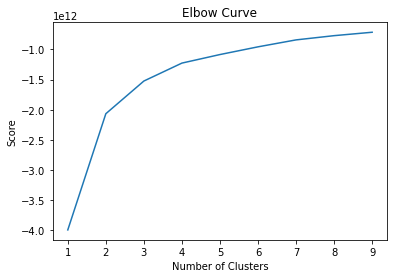

In [21]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### 4 is the ideal number of clusters, as 3 to 4 is the last significant jump.

# 04 k-means Clustering

In [22]:
# Create the k-means object.

#kmeans = KMeans(n_clusters = 4, n_jobs = -1) 
#commented out after the fact

In [23]:
# Fit the k-means object to the data.

#kmeans.fit(df_noname)
#commented out after the fact

In [24]:
#Rerun without n_jobs
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df)

KMeans(n_clusters=4)

In [25]:
df['clusters'] = kmeans.fit_predict(df)

In [26]:
df.head()

,student_body,median_parent_income,median_child_income,cost_of_attendance,pell_aid_per_student,institutional_grant_aid_avg,debt_median,student_income_10_years_median,clusters
0,4437.0,29000,19700,26546.0,3578.4820,3218.60,8500.0,26100.0,0
1,3572.0,101000,40100,41606.0,940.7532,11832.39,18500.0,43000.0,1
2,3244.0,66000,32500,11674.0,1870.4520,1152.64,5500.0,32900.0,2
3,9885.0,92300,27400,35919.0,1432.1950,4449.50,12250.0,38600.0,1
4,2110.0,67200,34100,19043.0,2758.5980,2502.68,9500.0,35200.0,2


In [27]:
df['clusters'].value_counts()

2    1103
0    1041
1     778
3     179
Name: clusters, dtype: int64

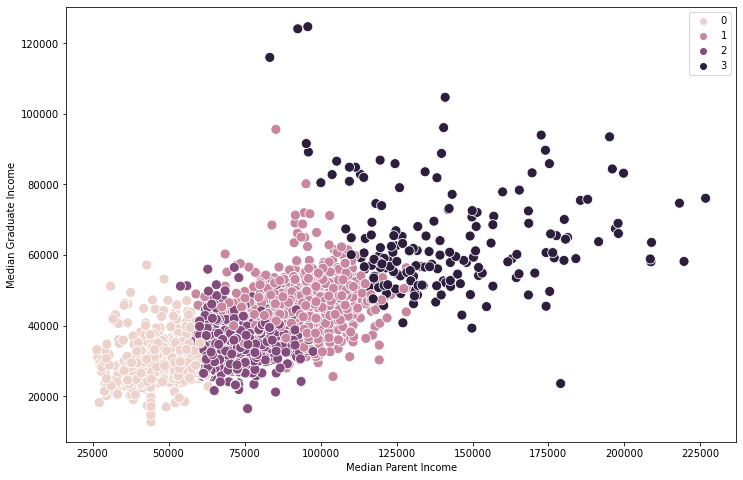

In [28]:
# Plot the clusters for the "student_income_10_years_median" and "median_parent_income" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['median_parent_income'], y=df['student_income_10_years_median'], hue=kmeans.labels_, s=100) 
#Subset `X` for the x and y arguments to avoid using their labels 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.

ax.grid(False)
plt.xlabel('Median Parent Income') # Label x-axis.
plt.ylabel('Median Graduate Income') # Label y-axis.
plt.show()

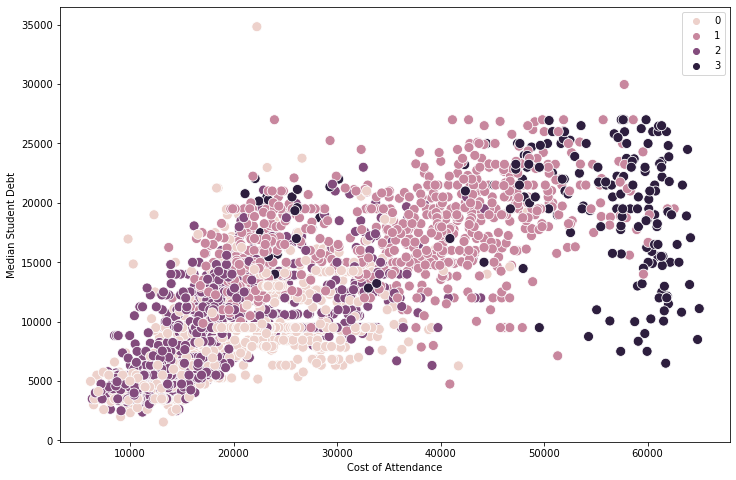

In [29]:
# Plot the clusters for the "debt_median" and "cost_of_attendance"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['cost_of_attendance'], y=df['debt_median'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Cost of Attendance') 
plt.ylabel('Median Student Debt')
plt.show()

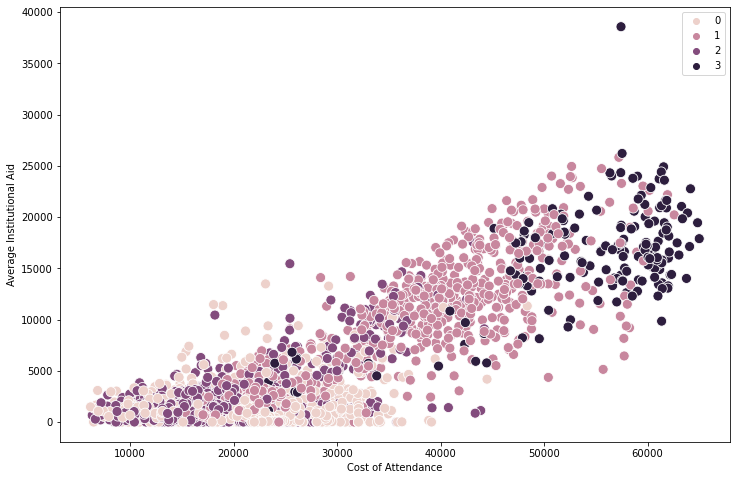

In [30]:
# Plot the clusters for the "institutional_grant_aid_avg" and "cost_of_attendance"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['cost_of_attendance'], y=df['institutional_grant_aid_avg'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Cost of Attendance') 
plt.ylabel('Average Institutional Aid')
plt.show()

#### "student_income_10_years_median" vs. "median_parent_income" is the most intersting scatterplot, as the clusters are most clearly separate in the scatterplot--it's the least heterogeneous. There is more overlap in the other two scatterplots above. Since it has data that looks easier to cluster separately, this makes sense.

In [31]:
#Create cluster column, naming clusters by color
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [32]:
df.columns

Index(['student_body', 'median_parent_income', 'median_child_income',
       'cost_of_attendance', 'pell_aid_per_student',
       'institutional_grant_aid_avg', 'debt_median',
       'student_income_10_years_median', 'clusters', 'cluster'],
      dtype='object')

In [33]:
#Descriptive statistics of each cluster
df.groupby('cluster').agg({'student_body':['mean', 'median'], 
                         'median_parent_income':['mean', 'median'], 
                         'median_child_income':['mean', 'median'],
                          'cost_of_attendance':['mean', 'median'],
                          'pell_aid_per_student':['mean', 'median'],
                          'institutional_grant_aid_avg':['mean', 'median'],
                          'debt_median':['mean', 'median'],
                          'student_income_10_years_median':['mean', 'median']})

student_body         median_parent_income          \
                    mean  median                 mean  median   
cluster                                                         
dark purple  5267.659218  3085.0        141784.357542  134700   
light pink   2416.748319   708.0         47717.195005   50100   
pink         5973.111825  2370.0         93391.131105   93350   
purple       5230.871260  2769.0         73092.293744   72300   

            median_child_income        cost_of_attendance           \
                           mean median               mean   median   
cluster                                                              
dark purple        63103.351955  60000       53185.759777  57429.0   
light pink         26788.760807  27100       21020.704131  22121.0   
pink               44479.177378  44500       35304.879177  37110.5   
purple             31553.309157  31900       18305.248413  16446.0   

            pell_aid_per_student            institutional_grant_aid_avg  \
                            mean     median                        mean   
cluster                                                                   
dark purple           717.390041   693.4536                15394.089106   
light pink           2386.821009  2374.6400                 1536.826167   
pink                 1362.622422  1315.0265                 9198.389254   
purple               1785.567048  1660.4520                 1872.687915   

                        debt_median          student_income_10_years_median  \
               median          mean   median                           mean   
cluster                                                                       
dark purple  16088.15  19425.374302  20300.0                   63677.094972   
light pink    1080.00   9004.451969   9235.0                   30805.859750   
pink          9425.81  17356.397172  17434.5                   45717.609254   
purple        1019.76   8763.467362   9500.0                   33984.678150   

                      
              median  
cluster               
dark purple  59600.0  
light pink   29300.0  
pink         45100.0  
purple       34100.0

#### Student body cluster means are far from their medians--all right skewed. Neither the means nor the medians change in a linear sequence.
#### Median parent income cluster means are close to their median values, so the data in each cluster is fairly balanced. Also, there is a near-linear sequence (+ ~22k) between the values.
#### Median child income cluster means are close to their median values, so the data in each cluster is fairly balanced. Neither the means nor the medians change in a linear sequence. However, the cluster medians are well spread out.
#### Cost of attendance cluster means are close to their median values, so the data in each cluster is fairly balanced. Neither the means nor the medians change in a linear sequence. However, the cluster medians are well spread out.
#### Pell aid per student cluster means are close to their median values, so the data in each cluster is fairly balanced. Neither the means nor the medians change in a linear sequence. Also, the lowest and highest medians are much further from the two central medians than the two central medians are from each other.
#### Institutional grant aid avg cluster means are not all close to their median values, so the data is not fairly balanced in every cluster. Neither the means nor the medians change in a linear sequence.
#### Debt median cluster means are not all close to their median values, so the data is not fairly balanced in every cluster. Neither the means nor the medians change in a linear sequence.
#### All but one of  student_income_10_years_median means are close to their medians, so most of the clusters have data that is fairly balanced. Neither the means nor the medians change in a linear sequence. However, the cluster medians are well spread out.
### Based off of these findings, the clusters are most well defined for median_parent_income, median_child_income, cost_of_attendance, and student_income_10_years_median (grad income).
#### If 1 is lowest cluster median and 4 is highest cluster median, then:
#### Parent income 1 has child income 1, cost of attendance 2, and grad income 1.
#### Parent income 2 has child income  2, cost of attendance 1, and grad income 2.
#### Parent income 3 has child income 3, cost of attendance 3, and grad income 3.
#### Parent income 4 has child income 4, cost of attendance, 4, and grad income 4.

### These variables should be at the focal point of the remainder of the analysis.

# 05 Export Data

In [34]:
#Add names to df
name = df_name['name']
df.insert(0, 'name', name)
df.head()

,name,student_body,median_parent_income,median_child_income,cost_of_attendance,pell_aid_per_student,institutional_grant_aid_avg,debt_median,student_income_10_years_median,clusters,cluster
0,ASA College,4437.0,29000,19700,26546.0,3578.4820,3218.60,8500.0,26100.0,0,light pink
1,Abilene Christian University,3572.0,101000,40100,41606.0,940.7532,11832.39,18500.0,43000.0,1,pink
2,Abraham Baldwin Agricultural College,3244.0,66000,32500,11674.0,1870.4520,1152.64,5500.0,32900.0,2,purple
3,Academy of Art University,9885.0,92300,27400,35919.0,1432.1950,4449.50,12250.0,38600.0,1,pink
4,Adams State University,2110.0,67200,34100,19043.0,2758.5980,2502.68,9500.0,35200.0,2,purple


In [35]:
df.to_csv(r'/Users/Nick/Documents/CareerFoundry/Immersion-6/College-Equity/02-Data/college-equity-clusters.csv')